In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_input = np.array([
    [0, 0], [1, 1],
    [0, 1], [1, 0]
])
train_output = np.array([0, 0, 1, 1])

In [188]:
np.random.seed(2)

w1 = np.random.rand(2, 2)
w2 = np.random.rand(2, )

sigmoid = lambda x: 1/(1 + np.exp(-x))
d_sigmoid = lambda x: x * (1-x)
print(w1)
print(w2)

[[0.4359949  0.02592623]
 [0.54966248 0.43532239]]
[0.4203678  0.33033482]


Text(0, 0.5, 'Loss value')

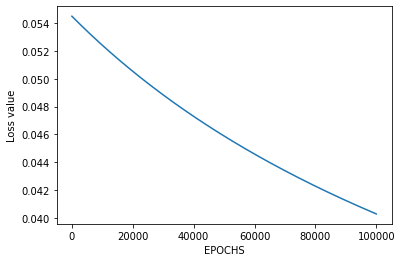

In [190]:
lr = 0.1
losses = []
for epoch in range(100_000):
    y1 = np.dot(train_input, w1) # (4, 2) 4 entrées vont vers 2 neuronnes
    b = sigmoid(y1) # (4, 2) fonction d'activation
    
    y2 = np.dot(b, w2) # (4, ) 4 entrées vont vers le neuronne de sortie
    c = sigmoid(y2) # (4, ) fonction d'activation
    loss = -(1/4)*np.sum(train_output*np.log(c)+(1-train_output)*np.log(1-c))
    losses.append(loss)
    
    # (4, ) Calcul de l'écart correspondant à (dE/dc)*(dc/dy2)
    e2 = (c - train_output) * d_sigmoid(c)
    dw2 = np.dot(e2, b) # (2, ) changement de w2
    
    # (4, 2) Calcul de l'écart correspondant à ((dE/dc)*(dc/dy2)) * (dy2/db)*(db/dy1)
    e1 = np.dot(e2.reshape(4, 1), w2.reshape(1, 2)) * d_sigmoid(b)
    dw1 = np.dot(e1.T, train_input) # (2, 2) changement de w1
    
    w1 -= dw1.T * lr
    w2 -= dw2 * lr
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [191]:
y1 = np.dot(train_input, w1) # (4, 2) 4 entrées vont vers 2 neuronnes
b = sigmoid(y1) # (4, 2) fonction d'activation

y2 = np.dot(b, w2) # (4, ) 4 entrées vont vers le neuronne de sortie
c = sigmoid(y2) # (4, ) fonction d'activation
c

array([0.01723033, 0.05624211, 0.9579982 , 0.95799822])